In [242]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [266]:
##Load the dataset¶
data= pd.read_csv('../activities.csv',delimiter=',')
data.head()

,activities,often,rare,mean,good_ok
0,bath,26,24,25,good
1,music,11,32,22,good
2,sex,10,10,10,good
3,pray,5,10,7,ok
4,read,18,10,14,good


In [267]:
##View the dimensions of the dataset
data.shape

(9, 5)

In [268]:
data['activities'].fillna(0, inplace=True)

In [269]:
#Converting words to integer values
def convert_to_int(word):
    word_dict = {'bath':1, 'music':2, 'sex':3, 'pray':4, 'read':5, 'exercise':6, 'alcohol':7, 'talking_to_spouse':8, 'medication':9}
    return word_dict[word]

In [270]:
X = data.iloc[:, :4]
X['activities'] = X['activities'].apply(lambda x : convert_to_int(x))

In [271]:
y = data.iloc[:, -1]

In [272]:
##Extracting the numerical features from the dataset
numeric_features= data.select_dtypes(include= ['int64', 'float64'])
numeric_features

,often,rare,mean
0,26,24,25
1,11,32,22
2,10,10,10
3,5,10,7
4,18,10,14
5,30,20,25
6,11,24,18
7,20,10,15
8,7,10,9


In [238]:
##Extracting the categorical features from the dataset
categorical_features= data.select_dtypes(include= ['object'])
categorical_features

,activities,good_ok
0,bath,good
1,music,good
2,sex,good
3,pray,ok
4,read,good
5,exercise,good
6,alcohol,ok
7,talking_to_spouse,ok
8,medication,ok


In [273]:
##Check the data type of each feature (int, float, object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  9 non-null      object
 1   often       9 non-null      int64 
 2   rare        9 non-null      int64 
 3   mean        9 non-null      int64 
 4   good_ok     9 non-null      object
dtypes: int64(3), object(2)
memory usage: 488.0+ bytes


In [274]:
##Check if there are any missing values in the dataset
for col in data:
    missing_values= data[col].isna().sum()
    if(missing_values>0):
        print('{} {}'.format(col, missing_values))

In [275]:
##Check the number of samples for each category in the target variable
data['good_ok'].value_counts()

good    5
ok      4
Name: good_ok, dtype: int64

<AxesSubplot:>

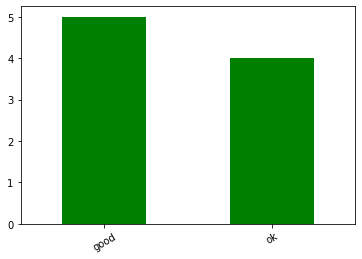

In [276]:
##Barplot to visualize the number of samples for each category in the target variable
data['good_ok'].value_counts().plot.bar( rot=30, color="green", width=0.5)

In [277]:
numeric_features = data.select_dtypes(include= ['int64', 'float64'])
categorical_features = data.select_dtypes(include= ['object'])

In [278]:
impute_it = IterativeImputer()

numeric_features= impute_it.fit_transform(numeric_features)
numeric_features= pd.DataFrame(numeric_features)
numeric_features.columns= data.select_dtypes(include= ['int64', 'float64']).columns.tolist()

data[numeric_features.columns]= numeric_features

data.good_ok.isna().sum()

0

In [279]:
##Dividing data into predictor variables (X) and target variable (y)
X= data.drop('good_ok', axis=1)
X.shape

(9, 4)

In [280]:
y= data["good_ok"]
y.shape

(9,)

In [281]:
##Dividing dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape


((7, 4), (2, 4))

In [286]:
criterion = ['gini', 'entropy']
splitter= ['best', 'random']
max_features= [5,10,13,16]
min_samples_leaf= [50,200,400,600]
max_depth = [2,4,6,8,10]

In [287]:
pipe = Pipeline(steps=[
    ('dec_tree', classifier)
])

parameters = dict(dec_tree__criterion =criterion,
                  dec_tree__splitter = splitter,
                  dec_tree__max_depth = max_depth,
                 dec_tree__max_features = max_features,
                 dec_tree__min_samples_leaf = min_samples_leaf
                 )

In [288]:
classifier_grid_search = GridSearchCV(pipe, parameters, cv=5,n_jobs=-1)

In [290]:
y_test_2= y_test.map({'good':1, 'bad':0})